In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
import calendar

In [2]:
#Setting directory and read csv output from the GEE
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv" 
df_allntl = pd.read_csv(belmontdir + doyNTL_allgrid3)

# Convert 'YYYY_MM_DD' column to datetime
df_allntl['YYYY_MM_DD'] = pd.to_datetime(df_allntl['YYYY_MM_DD'])

# Display the first few rows to verify the conversion
# print(df_allntl.head())

# Pivot the table
date_df = df_allntl.pivot(index='settl_pcod', columns='YYYY_MM_DD', values='NTLmean')

# Save the modified DataFrame to a CSV file
output_file = belmontdir + "allNTL_allgrid3_datetime.csv"
date_df.to_csv(output_file, index=True)  # Set index=True to include 'settl_pcod' in the CSV

In [3]:
date_df

YYYY_MM_DD,2012-01-19,2012-01-20,2012-01-21,2012-01-22,2012-01-23,2012-01-24,2012-01-25,2012-01-26,2012-01-27,2012-01-28,...,2023-12-21,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30
settl_pcod,,,,,,,,,,,,,,,,,,,,,
MG00000000032,0.404007,0.382916,0.382916,0.392612,0.383080,0.383080,0.383080,0.896500,1.045115,0.556032,...,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623
MG00000000033,0.472597,0.469730,0.469730,0.469730,0.469730,0.469730,0.469730,0.702417,0.934401,0.627712,...,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588
MG00000000037,0.205324,0.177662,0.177662,0.177662,0.177662,0.177662,0.177662,0.350626,0.239666,0.568685,...,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292
MG00000000038,0.213136,0.213136,0.213136,0.218590,0.213136,0.213136,0.213136,0.402815,0.400415,0.477744,...,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923
MG11000000001,0.337185,0.337185,0.337185,0.337185,0.337185,0.337185,0.337185,0.518327,0.337185,0.685458,...,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MG72716000003,0.665745,0.679804,0.678874,0.929711,0.589105,0.637498,0.559202,0.557533,0.555213,0.555213,...,3.665256,3.000000,2.638690,2.722193,2.928020,1.551357,2.928020,2.918797,2.928020,2.634741
MG72716000206,0.117037,0.117037,0.117037,0.371347,0.150026,0.150026,0.118689,0.130769,0.130769,0.130769,...,0.546773,0.778369,0.186577,0.196696,0.215901,0.215901,0.215901,0.215901,0.215901,0.215901
MG72716000242,0.108261,0.108261,0.108261,0.431848,0.141630,0.139457,0.108152,0.139457,0.139457,0.213370,...,0.629348,0.879783,0.330435,0.418587,0.149891,0.007500,0.149891,0.149891,0.149891,0.300109


In [4]:
# Next up is the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir+"MadTrack_SegmentID_DATE.shp")
#print(cyclone_track_gdf.columns)
columns_to_keep = ['NAME', 'DATE', 'Segment_ID', 'NATURE']
onset_df = cyclone_track_gdf[columns_to_keep]
onset_df = onset_df.rename(columns={'NAME': 'Cyclone', 'DATE': 'Onset_Date'})
print(onset_df.columns)

Index(['Cyclone', 'Onset_Date', 'Segment_ID', 'NATURE'], dtype='object')


In [5]:
# onset_df

,Cyclone,Onset_Date,Segment_ID,NATURE
0,NOT_NAMED,1980-01-10,1,NR
1,NOT_NAMED,1980-01-10,2,NR
2,NOT_NAMED,1980-01-10,3,NR
3,NOT_NAMED,1980-01-10,4,NR
4,NOT_NAMED,1980-01-10,5,NR
...,...,...,...,...
8284,FREDDY,2023-03-07,75,NR
8285,FREDDY,2023-03-07,76,NR
8286,FREDDY,2023-03-07,77,NR
8287,FREDDY,2023-03-07,78,NR


In [6]:
# Define the lag value
lag = 14  # Example lag value, adjust as needed

# Assuming onset_df, df_date, and other variables are defined earlier

# Ensure 'Onset_Date' is in datetime format
onset_df.loc[:, 'Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Remove duplicate rows based on the 'Cyclone' column
onset_df = onset_df.drop_duplicates(subset='Cyclone', keep='first')

# Filter unique cyclone names based on onset dates after 2011
valid_cyclone_names = onset_df[onset_df['Onset_Date'].dt.year >= 2012]['Cyclone'].unique()

# Initialize an empty DataFrame to store the results
final_df = pd.DataFrame(columns=['Cyclone', 'Settle_PCOD', 'hist_pre_average', 'hist_post_average'])

# Iterate over each valid cyclone name
for cyclone_name in valid_cyclone_names:
    # Iterate over each settle_pcod value
    for settle_pcod in date_df.index:
        result_dict = {'Settle_PCOD': settle_pcod, 'Cyclone': cyclone_name}
        
        # Check if cyclone onset information exists
        if cyclone_name in onset_df['Cyclone'].values:
            cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]
            cyclone_onset_year = cyclone_onset_date.year

            # Pre-cyclone period calculation
            pre_start_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day) - pd.Timedelta(days=lag)
            pre_end_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)
            pre_date_mask_range = pd.date_range(start=pre_start_date, end=pre_end_date)
            pre_filtered_dates = date_df.columns[date_df.columns.isin(pre_date_mask_range)]
            if not pre_filtered_dates.empty:
                pre_mean_values = date_df.loc[settle_pcod, pre_filtered_dates].mean()
                result_dict['hist_pre_average'] = pre_mean_values
        
            # Post-cyclone period calculation
            post_start_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)
            post_end_date = post_start_date + pd.Timedelta(days=lag)
            post_date_mask_range = pd.date_range(start=post_start_date, end=post_end_date)
            post_filtered_dates = date_df.columns[date_df.columns.isin(post_date_mask_range)]
            if not post_filtered_dates.empty:
                post_mean_values = date_df.loc[settle_pcod, post_filtered_dates].mean()
                result_dict['hist_post_average'] = post_mean_values

        else:
            print(f"Cyclone '{cyclone_name}' not found in the dataset.")

        # Append the result dictionary to the final DataFrame
        final_df = final_df.append(result_dict, ignore_index=True)

# Add 'Onset_Date' column by mapping the cyclone names from onset_df
final_df['Onset_Date'] = final_df['Cyclone'].map(onset_df.set_index('Cyclone')['Onset_Date'])

# The final DataFrame now includes the 'Onset_Date' column
final_df = final_df[['Cyclone', 'Settle_PCOD', 'hist_pre_average', 'hist_post_average', 'Onset_Date']]


In [7]:
final_df

,Cyclone,Settle_PCOD,hist_pre_average,hist_post_average,Onset_Date
0,CHANDA,MG00000000032,NaN,0.389946,2012-01-07
1,CHANDA,MG00000000033,NaN,0.470686,2012-01-07
2,CHANDA,MG00000000037,NaN,0.186882,2012-01-07
3,CHANDA,MG00000000038,NaN,0.213136,2012-01-07
4,CHANDA,MG11000000001,NaN,0.337185,2012-01-07
...,...,...,...,...,...
22605,FREDDY,MG72716000003,2.108010,2.174390,2023-02-21
22606,FREDDY,MG72716000206,0.239655,0.264145,2023-02-21
22607,FREDDY,MG72716000242,0.200650,0.303851,2023-02-21
22608,FREDDY,MG72716000429,0.272792,0.242380,2023-02-21


In [8]:
# Assuming date_df.columns have been converted to datetime where applicable
for idx, row in final_df.iterrows():
    settl_pcod = row['Settle_PCOD']
    onset_date = pd.to_datetime(row['Onset_Date'])

    pre_start = onset_date - pd.Timedelta(days=lag)
    post_end = onset_date + pd.Timedelta(days=lag)

    if settl_pcod in date_df.index:
        settl_data = date_df.loc[settl_pcod]

        # Combine conditions into a single step for both pre and post periods
        pre_data = settl_data[(settl_data.index >= pre_start) & (settl_data.index < onset_date)]
        post_data = settl_data[(settl_data.index > onset_date) & (settl_data.index <= post_end)]

        pre_mean = pre_data.mean()
        post_mean = post_data.mean()

        final_df.at[idx, 'cyclone_pre_average'] = pre_mean
        final_df.at[idx, 'cyclone_post_average'] = post_mean


In [11]:
# Ensure the relevant columns are in a numeric format for calculation
final_df['cyclone_pre_average'] = pd.to_numeric(final_df['cyclone_pre_average'], errors='coerce')
final_df['cyclone_post_average'] = pd.to_numeric(final_df['cyclone_post_average'], errors='coerce')

# Calculate the percent difference and add it as a new column
final_df['cyclone_PD'] = ((final_df['cyclone_post_average'] - final_df['cyclone_pre_average']) / final_df['cyclone_pre_average']) * 100
final_df['hist_cyclone_PD'] = ((final_df['hist_post_average'] - final_df['hist_pre_average']) / final_df['hist_pre_average']) * 100

final_df['PD'] = final_df['hist_cyclone_PD'] - final_df['cyclone_PD']
final_df

,Cyclone,Settle_PCOD,hist_pre_average,hist_post_average,Onset_Date,cyclone_pre_average,cyclone_post_average,cyclone_PD,hist_cyclone_PD,PD
0,CHANDA,MG00000000032,NaN,0.389946,2012-01-07,NaN,0.389946,NaN,NaN,NaN
1,CHANDA,MG00000000033,NaN,0.470686,2012-01-07,NaN,0.470686,NaN,NaN,NaN
2,CHANDA,MG00000000037,NaN,0.186882,2012-01-07,NaN,0.186882,NaN,NaN,NaN
3,CHANDA,MG00000000038,NaN,0.213136,2012-01-07,NaN,0.213136,NaN,NaN,NaN
4,CHANDA,MG11000000001,NaN,0.337185,2012-01-07,NaN,0.337185,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22605,FREDDY,MG72716000003,2.108010,2.174390,2023-02-21,2.098847,2.169969,3.388600,3.148946,-0.239654
22606,FREDDY,MG72716000206,0.239655,0.264145,2023-02-21,0.244245,0.270484,10.742880,10.218734,-0.524146
22607,FREDDY,MG72716000242,0.200650,0.303851,2023-02-21,0.203047,0.313620,54.456677,51.433354,-3.023324
22608,FREDDY,MG72716000429,0.272792,0.242380,2023-02-21,0.278263,0.245680,-11.709578,-11.148152,0.561426


In [20]:
# Write the DataFrame to a CSV file
final_df.to_csv(belmontdir + 'value_all_data.csv', index=False)

print("CSV file 'value_all_data.csv' has been created.")

CSV file 'value_all_data.csv' has been created.


In [12]:
# Creating a pivot table for visualization
pivot_df = final_df.pivot("Cyclone", "Settle_PCOD", "PD")
pivot_df

Settle_PCOD,MG00000000032,MG00000000033,MG00000000037,MG00000000038,MG11000000001,MG11000000005,MG11000000013,MG11000000022,MG11000000030,MG11000000034,...,MG72712000205,MG72712000225,MG72712000227,MG72716000001,MG72716000002,MG72716000003,MG72716000206,MG72716000242,MG72716000429,MG72716000438
Cyclone,,,,,,,,,,,,,,,,,,,,,
ABELA,0.431357,-0.056357,0.360758,0.841903,0.089614,0.901649,0.022165,0.050269,0.352278,-0.399225,...,1.319745,0.934190,-0.331916,0.693285,0.319014,0.090097,0.956767,-1.406569,-3.652989,-1.076483
ANA,-1.583643,-1.648515,-3.163736,-4.180750,-2.380630,-0.591466,-2.124715,0.376780,-4.746913,0.249191,...,0.959835,-2.054452,-1.291541,-4.292391,-2.885639,-0.237182,-3.614470,-3.310722,-3.682444,-3.314708
ANAIS,0.044825,0.344600,-0.053078,0.813022,0.697031,0.813674,0.931643,-0.648331,-1.175464,0.255263,...,4.547644,1.967740,3.853996,4.559405,3.944081,0.943830,0.921292,1.808999,0.841200,1.401578
AVA,-2.720163,-1.016279,-0.512371,-1.116771,-0.593316,-1.559690,-2.026118,-1.192893,-1.951477,-0.153938,...,0.922158,0.636216,0.154047,0.573676,-0.779795,0.020005,0.386205,0.363170,-0.052783,0.158600
BATSIRAI,-0.645066,-1.170785,-1.992758,-0.269127,-0.478733,-1.874010,1.013137,0.642924,0.475506,0.132836,...,-9.359122,-1.172016,-0.027587,-3.831687,-1.634850,0.079699,-3.712269,-2.315524,1.358373,-1.875536
BELNA,0.542090,0.745893,1.344623,1.269082,1.219426,1.566458,0.745910,1.147699,1.130758,0.242762,...,1.859237,1.607705,1.231651,2.208723,0.264881,0.271574,2.919313,2.931074,2.544612,1.989922
CHALANE,1.232681,-0.891045,1.668691,0.605213,0.587441,-0.814857,1.170363,1.160570,0.973565,-0.381754,...,-4.222586,-4.238872,-6.823372,0.914053,0.420523,0.406605,-0.914047,-2.830195,0.796856,-3.288852
CHANDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHEDZA,1.333043,1.076385,-0.996655,-0.705418,-0.365258,-3.656918,-0.429747,-0.027089,0.014635,1.005403,...,-0.897432,-0.938649,-0.897118,-6.704494,-2.495778,-1.162135,-5.009200,-5.498171,-3.573397,-9.962424


### Visualising 50 Settlements with the Lowest PD Values

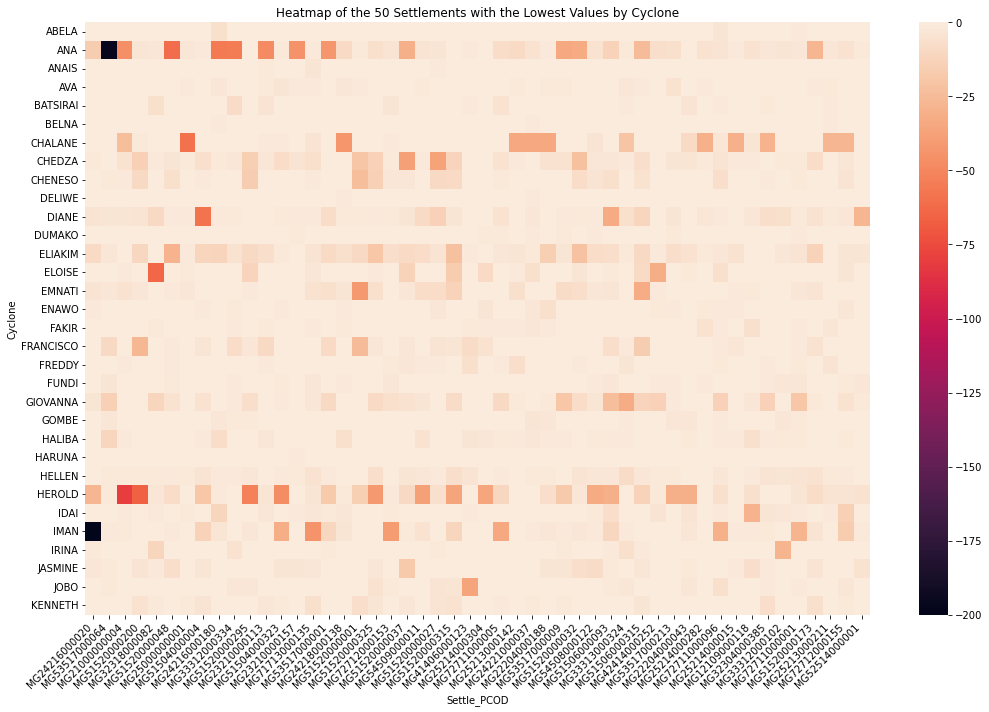

In [13]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Step 2: Calculate the minimum value across cyclones for each Settle_PCOD
min_values = pivot_df_filtered.min(axis=0)

# Step 3: Select the 50 settlements with the lowest values
lowest_50_settlements = min_values.nsmallest(50).index

# Step 4: Filter the DataFrame to include only these lowest 50 settlements
filtered_df = pivot_df_filtered[lowest_50_settlements]

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary
sns.heatmap(filtered_df, cmap="rocket", xticklabels=True, yticklabels=True, annot=False, vmin=-200, vmax=0)  # Set annot=True if you want to see the values
plt.title("Heatmap of the 50 Settlements with the Lowest Values by Cyclone")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Rotate settlement names for better readability
plt.tight_layout()
plt.show()

In [14]:
# Printing the columns of the filtered_df DataFrame
# print(filtered_df.columns)

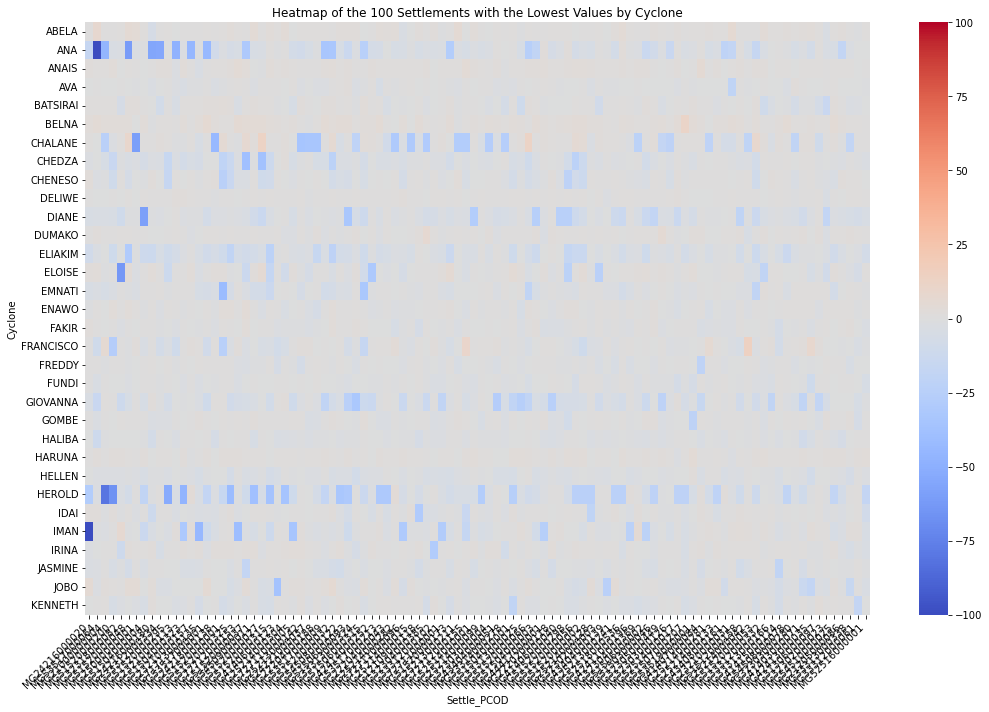

In [15]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Step 2: Calculate the minimum value across cyclones for each Settle_PCOD
min_values = pivot_df_filtered.min(axis=0)

# Step 3: Select the 100 settlements with the lowest values
lowest_100_settlements = min_values.nsmallest(100).index

# Step 4: Filter the DataFrame to include only these lowest 100 settlements
filtered_df = pivot_df_filtered[lowest_100_settlements]

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary
sns.heatmap(filtered_df, cmap="coolwarm", xticklabels=True, yticklabels=True, annot=False, vmin=-100, vmax=100)  # Set annot=True if you want to see the values
plt.title("Heatmap of the 100 Settlements with the Lowest Values by Cyclone")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Rotate settlement names for better readability
plt.tight_layout()
plt.show()

In [16]:
# Filtering the DataFrame to only include BATSIRAI
df_ana = pivot_df.loc[["ANA"]]

# Transpose df_batsirai to make settlements rows for easier sorting
df_ana_transposed = df_ana.T

# Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
df_ana_sorted = df_ana_transposed.sort_values(by="ANA")

# Display the sorted DataFrame
print(df_ana_sorted)

Cyclone               ANA
Settle_PCOD              
MG53517000064 -197.335815
MG51520000048  -61.577766
MG24216000180  -55.494482
MG33312000334  -55.047619
MG23210000113  -48.104912
...                   ...
MG42423000124    2.173187
MG52518000536    2.549144
MG22204000156    2.637921
MG51520000290    3.302927
MG51520000254    3.592700

[665 rows x 1 columns]


Cyclone              IMAN
Settle_PCOD              
MG24216000020 -301.755835
MG71713000135  -44.266819
MG72712000153  -40.343431
MG72711000005  -34.617123
MG51504000323  -31.956810
...                   ...
MG32304000264    8.072085
MG33312000200    8.074449
MG22203000194    9.486323
MG32304000001    9.887685
MG33312000108    9.960275

[665 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

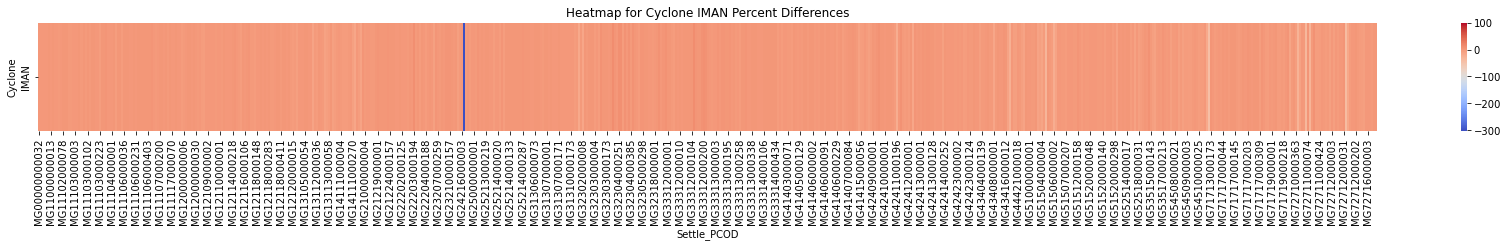

In [17]:
# Filtering the DataFrame to only include BATSIRAI
df_iman = pivot_df.loc[["IMAN"]]

# Transpose df_batsirai to make settlements rows for easier sorting
df_iman_transposed = df_iman.T

# Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
df_iman_sorted = df_iman_transposed.sort_values(by="IMAN")

# Display the sorted DataFrame
print(df_iman_sorted)
# Visualizing the heatmap for BATSIRAI
plt.figure(figsize=(30, 2))  
sns.heatmap(df_iman, cmap="coolwarm", vmin=-305, vmax=100)
plt.title("Heatmap for Cyclone IMAN Percent Differences")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.show

Cyclone         BATSIRAI
Settle_PCOD             
MG32302000023 -14.451527
MG32304000264 -12.395246
MG31307000171 -12.122399
MG42414000322 -10.772759
MG33313000025 -10.380125
...                  ...
MG51520000140   2.243398
MG71718000051   2.318258
MG51520000001   2.360916
MG51506000315   2.467472
MG23209000001   2.509651

[665 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

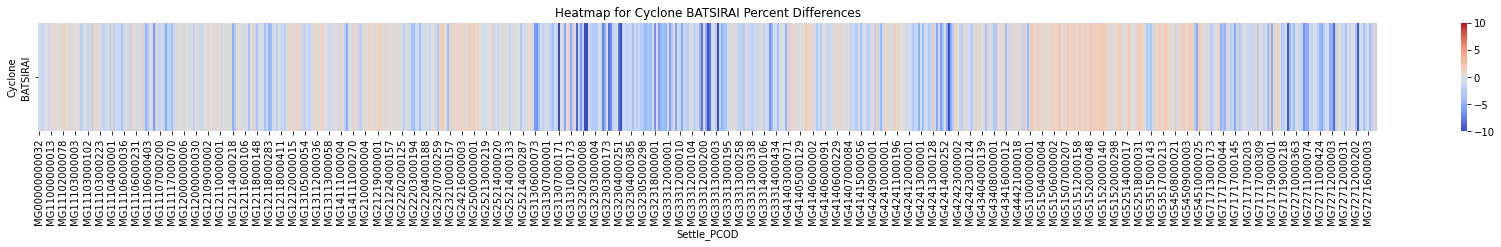

In [18]:
# Filtering the DataFrame to only include BATSIRAI
df_batsirai = pivot_df.loc[["BATSIRAI"]]


# Transpose df_batsirai to make settlements rows for easier sorting
df_batsirai_transposed = df_batsirai.T

# Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
df_batsirai_sorted = df_batsirai_transposed.sort_values(by="BATSIRAI")

# Display the sorted DataFrame
print(df_batsirai_sorted)

# Filtering the DataFrame to only include BATSIRAI
df_batsirai = pivot_df.loc[["BATSIRAI"]]

# Visualizing the heatmap for BATSIRAI
plt.figure(figsize=(30, 2))  
sns.heatmap(df_batsirai, cmap="coolwarm", vmin=-10, vmax=10)
plt.title("Heatmap for Cyclone BATSIRAI Percent Differences")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.show

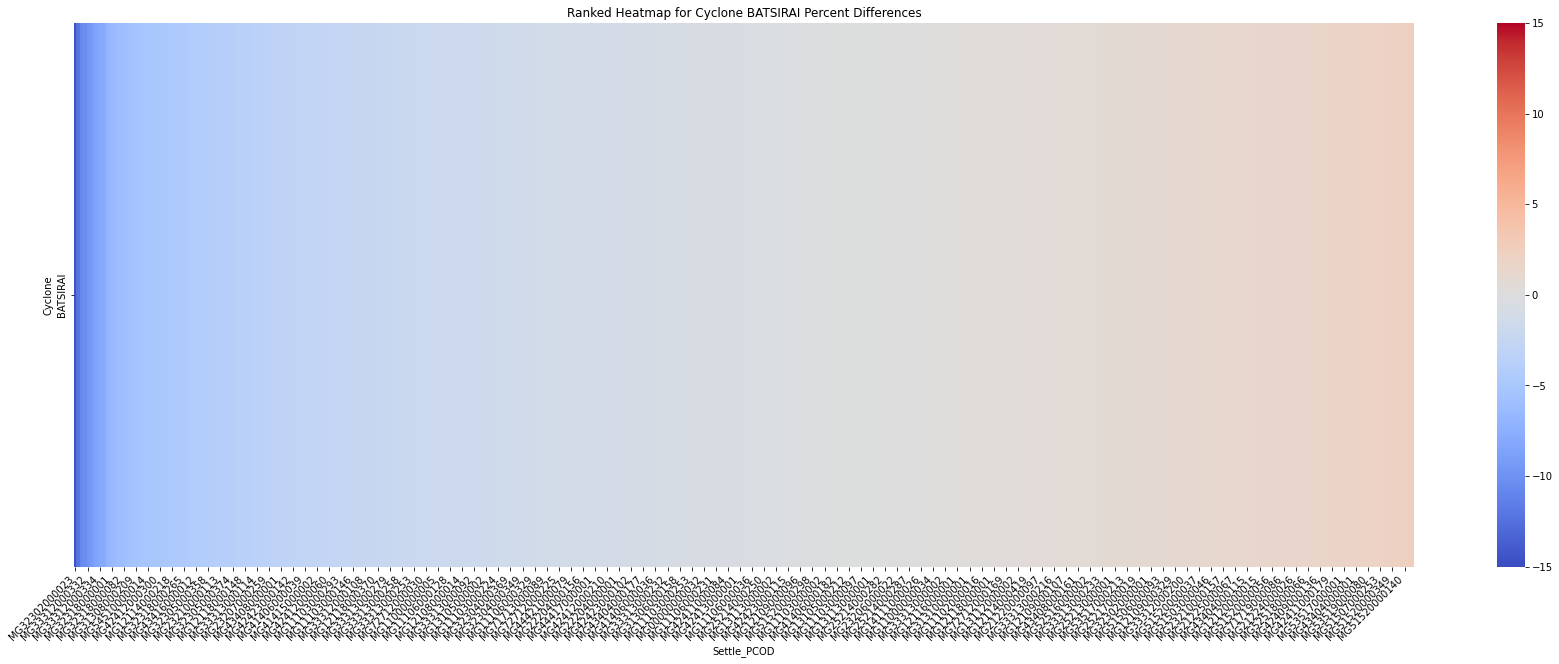

In [19]:
plt.figure(figsize=(30, 10))  # Adjusted for better visibility
sns.heatmap(df_batsirai_sorted.T, cmap="coolwarm", vmin=-15, vmax=15, annot=False)
plt.title("Ranked Heatmap for Cyclone BATSIRAI Percent Differences")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Rotate settlement names for better readability
plt.show()
